

    
<center>
<img src="FIFA20.jpg" />
        
# Diplo 2021
# Clasificacion con FIFA 20

### Práctico Ana Georgina Flesia  

### Vamos a trabajar con otro grupo de datos correspondiente al juego FIFA, el recolectado en el año 2020. 

In [2]:
import os
import pandas as pd

df = pd.read_csv('players_20.csv')
df.drop('sofifa_id', axis = 1, inplace = True)
df.describe().style.format("{:.1f}")

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,16980.0,18038.0,18038.0,1126.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0
mean,25.3,181.4,75.3,66.2,71.5,2484037.6,9456.9,1.1,2.9,2.4,4740717.4,20.1,2021.1,12.1,67.7,52.3,57.2,62.5,51.6,64.9,65.4,63.1,61.8,66.4,37.8,63.4,49.7,45.6,52.2,58.7,42.8,55.6,47.3,42.7,52.8,58.5,64.3,64.4,63.5,61.8,63.9,58.2,64.9,62.9,65.2,46.8,55.7,46.4,50.1,53.6,48.4,58.5,46.8,47.6,45.6,16.6,16.4,16.2,16.4,16.7
std,4.7,6.8,7.0,6.9,6.1,5585481.1,21351.7,0.4,0.7,0.8,11030016.3,16.6,1.3,6.7,11.3,14.0,10.4,10.3,16.4,9.8,7.7,7.2,7.5,8.2,10.6,8.4,18.3,19.6,17.4,14.7,17.7,18.9,18.4,17.4,15.2,16.7,15.0,14.8,14.8,9.1,14.2,13.3,11.9,16.0,12.5,19.3,17.3,20.8,19.6,14.0,15.7,11.9,20.1,21.6,21.2,17.7,17.0,16.6,17.1,18.0
min,16.0,156.0,50.0,48.0,49.0,0.0,0.0,1.0,1.0,1.0,13000.0,1.0,2019.0,1.0,24.0,15.0,24.0,23.0,15.0,27.0,44.0,42.0,35.0,45.0,12.0,41.0,5.0,2.0,5.0,7.0,3.0,4.0,6.0,4.0,8.0,5.0,12.0,11.0,11.0,21.0,12.0,14.0,19.0,12.0,20.0,4.0,9.0,3.0,2.0,9.0,7.0,12.0,1.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0
25%,22.0,177.0,70.0,62.0,67.0,325000.0,1000.0,1.0,3.0,2.0,563000.0,9.0,2020.0,6.0,61.0,42.0,50.0,57.0,36.0,59.0,60.0,58.0,57.0,60.8,29.0,58.0,38.0,30.0,44.0,54.0,30.0,50.0,34.0,31.0,43.0,54.0,56.0,57.0,55.0,56.0,56.0,48.0,58.0,56.0,58.0,32.0,44.0,25.0,39.0,44.0,39.0,51.0,29.0,27.0,24.0,8.0,8.0,8.0,8.0,8.0
50%,25.0,181.0,75.0,66.0,71.0,700000.0,3000.0,1.0,3.0,2.0,1200000.0,17.0,2021.0,12.0,69.0,54.0,58.0,64.0,56.0,66.0,65.0,63.0,61.0,66.0,39.0,64.0,54.0,49.0,56.0,62.0,44.0,61.0,49.0,41.0,56.0,63.0,67.0,67.0,66.0,62.0,66.0,59.0,66.0,66.0,66.0,51.0,58.0,52.0,55.0,55.0,49.0,60.0,52.0,55.0,52.0,11.0,11.0,11.0,11.0,11.0
75%,29.0,186.0,80.0,71.0,75.0,2100000.0,8000.0,1.0,3.0,3.0,3700000.0,27.0,2022.0,18.0,75.0,63.0,64.0,69.0,65.0,72.0,70.0,68.0,66.0,72.0,46.0,69.0,64.0,62.0,64.0,68.0,56.0,68.0,62.0,56.0,64.0,69.0,75.0,75.0,74.0,68.0,74.0,68.0,73.0,74.0,74.0,62.0,69.0,64.0,64.0,64.0,60.0,67.0,64.0,66.0,64.0,14.0,14.0,14.0,14.0,14.0
max,42.0,205.0,110.0,94.0,95.0,105500000.0,565000.0,5.0,5.0,5.0,195800000.0,99.0,2026.0,30.0,96.0,93.0,92.0,96.0,90.0,90.0,90.0,92.0,93.0,92.0,65.0,91.0,93.0,95.0,93.0,92.0,90.0,97.0,94.0,94.0,92.0,96.0,97.0,96.0,96.0,96.0,97.0,95.0,95.0,97.0,97.0,94.0,95.0,92.0,95.0,94.0,92.0,96.0,94.0,92.0,90.0,90.0,92.0,93.0,91.0,92.0


Veamos si es muy diferente al dataset trabajado anteriormente

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 103 entries, player_url to rb
dtypes: float64(16), int64(44), object(43)
memory usage: 14.4+ MB


# Preguntas

In [4]:
most_expns_plyr = df.loc[df.value_eur == df['value_eur'].max(),'short_name']
print('El jugador mas caro 2020 es', most_expns_plyr.values[0])

top_wage_plyr = df.loc[df.wage_eur == df['wage_eur'].max(),'short_name']
print('El jugador mejor pago en 2020 es', top_wage_plyr.values[0])

El jugador mas caro 2020 es Neymar Jr
El jugador mejor pago en 2020 es L. Messi


In [5]:
print('El pais con mas jugadores en FIFA 20 es', df['nationality'].value_counts().idxmax())

El pais con mas jugadores en FIFA 20 es England


### Inspeccionemos las posiciones en las que los jugadores han participado del juego.

In [6]:
df.player_positions[35:45]

35             CB
36             CM
37    CAM, LM, ST
38         ST, LM
39         LW, LM
40         CB, LB
41    RW, CAM, CM
42            CDM
43         CF, LM
44            CDM
Name: player_positions, dtype: object

### Para poder hacer este trabajo, combinamos las etiquetas para tener solo cuatro etiquetas

In [7]:
def combine_positions(row):
    # There are 15 different positions
    positions = row['player_positions'].split(', ') 
    N = len(positions)
    if N < 3:
        # If a player has two positions the first one will be considered as their
        # position, of course, players with only one position won't be affected
        position = positions[0]
        if position in ['ST', 'LW', 'RW','CF']: #4
            return 0 #ATTACKER
        elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
            return 1 #MIDFIELDER
        elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
            return 2 #DEFENDER
        elif position in ['GK']: #1
            return 3 #GOALKEEPER
    else: # If player has three possible positions
        position_count = [0, 0, 0, 0] 
        for position in positions:
            if position in ['ST', 'LW', 'RW','CF']: #4
                index = 0 #ATTACKER
            elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
                index = 1 #MIDFIELDER
            elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
                index = 2 #DEFENDER
            elif position in ['GK']: #1
                index = 3 #GOALKEEPER
            else:
                continue 
            position_count[index] += 1 
        # This will count which was the most repeated position and assign it
        # to the player
        return position_count.index(max(position_count))

df['player_positions'] = df.apply(combine_positions, axis=1)

### Observemos la variable overall que representa el score que ordena los jugadores de mejor a peor.

/home/adalisa/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew of the distribution is 0.07089343291701235
Kurtosis of the distribution is 0.05761583098542822


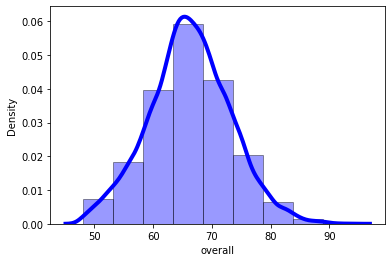

In [8]:
import seaborn as sns
import numpy as np

bins = np.linspace(df.overall.min(), df.overall.max(), 10)
sns.distplot(df['overall'], hist=True, 
             bins=bins, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print('Skew of the distribution is', df['overall'].skew())
print('Kurtosis of the distribution is', df['overall'].kurt())

# Dataset solo con las variables de habilidades de los jugadores

In [9]:
df = df[['skill_moves', 'player_positions', 'attacking_crossing', 'attacking_finishing',
         'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
         'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
         'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
         'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
         'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
         'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
         'mentality_vision', 'mentality_penalties', 'mentality_composure',
         'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
         'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
         'goalkeeping_positioning', 'goalkeeping_reflexes']]
df.isnull().sum()

skill_moves                   0
player_positions              0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeep

### Armemos ahora un conjunto de test y otro de test para calcular generalizacion de los métodos

In [10]:
from sklearn.model_selection import train_test_split

# Create X and y
X = df.drop(["player_positions"],axis = 1)
y = df.player_positions

# Split the data to 80-20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

### Cada método tiene muchos parámetros, para que sean comparables, hay que buscar los mejores parámetros usando la muestra de entrenamiento.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Clasificadores

AdaBoostClassifier: este algoritmo comienza ajustando un clasificador en el conjunto de datos original y luego ajusta copias adicionales del clasificador en el mismo conjunto de datos pero donde los pesos de las instancias clasificadas incorrectamente se ajustan de modo que los clasificadores posteriores se centren más en casos difíciles.

Bagging Classifier: es un algoritmo que ajusta clasificadores base, cada uno en un subconjunto aleatorio del conjunto de datos original y luego agrega su prediccion individual(ya sea por voto o promedio) para formar una prediccion final.El objetivo es generar un modelo compuesto con menor tasa de error.

ExtraTreesClassifier: este algoritmo implementa un estimador que se ajusta a varios árboles de decisión aleatorios (también conocidos como árboles adicionales) en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

GradientBoostingClassifier: este algoritmo construye un modelo aditivo de manera progresiva por etapas. Permite la optimización de funciones arbitrarias de pérdida diferenciable. En cada etapa, las n_clases de los árboles de regresión se ajustan en el gradiente negativo de la función de pérdida de desviación binomial o multinomial. La clasificación binaria es un caso especial donde solo se induce un solo árbol de regresión.

RandomForestClassifier: un bosque aleatorio es un estimador que se ajusta a varios clasificadores de árbol de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste. El tamaño de la submuestra siempre es el mismo que el tamaño de la muestra de entrada original, pero las muestras se extraen con reemplazo y a diferencia de Bagging tambien se aleatorizan las variables.

LogisticRegression : la regresión logística es un método estadístico para analizar un conjunto de datos en el que hay una o más variables independientes que determinan un resultado. El resultado se mide con una variable dicotómica. En este modelo, las probabilidades que describen los posibles resultados de un solo ensayo se modelan utilizando una función logística.


KNeighborsClassifier: Clasificador que implementa el voto de k-vecinos más cercanos.

SVC: Usa un clasificador discriminativo definido formalmente por un hiperplano de separación. Es decir, dados los datos de entrenamiento etiquetados, el algoritmo genera un hiperplano óptimo que categoriza nuevos ejemplos. En dos espacios dimensionales, este hiperplano es una línea que divide un plano en dos partes donde en cada clase se encuentra a cada lado.


DecisionTree: los árboles de decisión son un método de aprendizaje supervisado no paramétrico utilizado para la clasificación y la regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante el aprendizaje de reglas de decisión simples inferidas de las características de los datos.


ExtraTreeClassifier: estos algoritmos difieren de los árboles de decisión clásicos en la forma en que se construyen. Al buscar la mejor división para separar las muestras de un nodo en dos grupos, se dibujan divisiones aleatorias para cada una de las características max_features seleccionadas aleatoriamente y se elige la mejor división entre ellas. Cuando max_features se establece en 1, esto equivale a construir un árbol de decisión totalmente aleatorio.


XGBoost: es un algoritmo de aprendizaje automático de conjunto basado en un árbol de decisión que utiliza un marco de refuerzo de gradiente.

In [12]:
#Clasificadores usuales
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
#Evaluaciones usuales de los modelos
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

# K vecinos mas cercanos

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:


pipe_knn = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
    ])

params_knn = {
    'knn__n_neighbors': range(1, 20)
    }

search_knn = GridSearchCV(estimator=pipe_knn,
                      param_grid=params_knn,
                      cv = 5,
                      return_train_score=True)

search_knn.fit(X_train, y_train)
print(f" Best score is: {search_knn.best_score_} with parameters: {search_knn.best_params_}")

 Best score is: 0.8800440328785062 with parameters: {'knn__n_neighbors': 19}


### El único parametro es K y despues de 35 minutos, encontro que el mejor k en 19 vecinos

In [15]:
knn = KNeighborsClassifier(n_neighbors = 19)
# Train the model
knn.fit(X_train, y_train)
# Get the predict value from X_test
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# Report
print(classification_report(y_pred_knn,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_knn, y_test))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Unnormalized Confusion Matrix", None),
                  ("Normalized Confusion Matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

# Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

pipe_decsT = Pipeline([
    ('sc', StandardScaler()),
    ('decsT', DecisionTreeClassifier())
    ])

params_decsT = {
    'decsT__criterion' : ['gini', 'entropy'],
    'decsT__max_depth' : np.arange(3, 15)
    }

search_decsT = GridSearchCV(estimator=pipe_decsT,
                      param_grid=params_decsT,
                      cv = 5,
                      return_train_score=True)

search_decsT.fit(X_train, y_train)
print(f" Best score is: {search_decsT.best_score_} with parameters: {search_decsT.best_params_}")

### Encontramos que la metrica Gini y la profundidad es 8

In [ ]:
scores_decsT = search_decsT.cv_results_['mean_test_score']
criterion = ['gini', 'entropy']
DEPTH = np.arange(3, 15)
for idx, criterion in enumerate(criterion):
    for score, depth in (zip(scores_decsT[idx*len(DEPTH): (idx+1)*len(DEPTH)], DEPTH)):
        print(f"{depth, criterion}: {score:.10f}")

In [ ]:
decsT = DecisionTreeClassifier(max_depth=8)
decsT.fit(X_train,y_train)
y_pred_decsT = decsT.predict(X_test)

In [ ]:
# Report
print(classification_report(y_pred_decsT,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_decsT,y_test))

In [ ]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(decsT.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

# Support Vector Machine 

In [ ]:
from sklearn.svm import SVC
import numpy as np

kernels = ['rbf', 'poly', 'sigmoid']
C = np.logspace(-2, 10, 13)

pipe_svm = Pipeline([
    ('sc', StandardScaler()),
    ('SVM', SVC())
    ])

params_svm = {'SVM__C': C,
              'SVM__kernel': kernels,
             }

search_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=params_svm,
                      cv = 5,
                      return_train_score=True)

search_svm.fit(X_train, y_train)
print(f" Best score is: {search_svm.best_score_} with parameters: {search_svm.best_params_}")

{'SVM__C': 1.0, 'SVM__kernel': 'rbf'} es el default 

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)

In [ ]:
# Report
print(metrics.classification_report(y_pred_svm,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_svm,y_test))

In [ ]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
C = np.logspace(-2, 10, 13)

pipe_lr = Pipeline([
    ('sc', StandardScaler()),
    ('LR', LogisticRegression())
    ])

params_lr = {
    'LR__C': C,
    'LR__solver': solver
    }

search_lr = GridSearchCV(estimator=pipe_lr,
                      param_grid=params_lr,
                      cv = 5,
                      return_train_score=True)

search_lr.fit(X_train, y_train)
print(f" Best score is: {search_lr.best_score_} with parameters: {search_lr.best_params_}")

In [ ]:
lr = LogisticRegression(C=10, solver='newton-cg') 
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Report
print(metrics.classification_report(y_pred_lr,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_lr,y_test))

In [ ]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

## Gradient Boosting Classifier

### A continuación se pretende realizar un mejoramiento de los parámetros del algoritmo Gradient Boosting Classifier. Para ello se probarán diferentes combinaciones de algunos parámetros que seran considerados dentro de ciertos rangos y se buscara la combinación óptima. Los parámetros que se utilizaran con valores diferentes a los establecidos por defecto son: **min_samples_split**, **subsample**,**max_depth**, **learning_rate**, **n_estimators**.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
params = {
        'min_samples_split':[180, 370],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [5,8]
        }
GBC =  ensemble.GradientBoostingClassifier(learning_rate=0.02, n_estimators=600,min_samples_leaf = 50, warm_start=True)
folds = 3
param_comb = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(GBC, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )
random_search.fit(X_train,y_train)
print('\n Mejores hypermarametros:')
print(random_search.best_params_)


**El clasificador Gradient Boosting queda determinado por los siguientes parametros:**

In [ ]:
ejemplos = np.array([[ 'Parametro', 'Valor'],
['criterion', 'friedman_mse'], 
['init', 'None'],
['learning_rate', 0.02], 
['loss', 'deviance'], 
['max_depth' ,8],
['max_features', 'None'], 
['max_leaf_nodes','None'],
['min_impurity_decrease',0.0], 
['min_impurity_split','None'],
['min_samples_leaf',50], 
['min_samples_split',180],
['min_weight_fraction_leaf',0.0], 
['n_estimators', 600],
['n_iter_no_change','None'], 
['presort','auto'],
['random_state','None'], 
['subsample',0.6], 
['tol', 0.0001],
['validation_fraction',0.1], 
['verbose',0], 
['warm_start',True]])
Parametros = pd.DataFrame(data=ejemplos[1:,0:],
                   columns = ejemplos[0,0:])

In [ ]:
GBC=ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=180,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None,
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)
GBC_model  = GBC.fit(X_train,y_train)

y_pred_GBC = GBC.predict(X_test)

print('Exactitud del clasificador Gradient Boost Classifier en la base de prueba: {:.2f}'.format(GBC.score(X_test, y_test)))

In [ ]:
print(metrics.classification_report(y_pred_GBC,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_GBC,y_test))

In [ ]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GBC_model, X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

# XGboost
XGBoost es un algoritmo de aprendizaje automático de conjunto basado en un árbol de decisión que utiliza un marco de refuerzo de gradiente.

## Parametros generales
Se relacionan con el refuerzo que estamos utilizando para impulsar, comúnmente árbol o modelo lineal

booster [default= gbtree ] Qué booster usar. Puede ser gbtree, gblinear o dart; gbtree y dart usan modelos basados en árboles, mientras que gblinear usa funciones lineales.

silent [default=0] [Deprecated] Obsoleto. Por favor, use verbosidad en su lugar.

verbosity [default=1] Verbosidad de la impresión de mensajes. Los valores válidos son 0 (silencioso), 1 (advertencia), 2 (información), 3 (depuración). A veces, XGBoost intenta cambiar las configuraciones en función de la heurística, que se muestra como mensaje de advertencia. Si hay un comportamiento inesperado, intente aumentar el valor de la verbosidad.

nthread [default to maximum number of threads available if not set] Número de subprocesos paralelos utilizados para ejecutar XGBoost.

disable_default_eval_metric [default=0] Marcador para deshabilitar la métrica predeterminada. Establezca en> 0 para deshabilitar.

num_pbuffer [set automatically by XGBoost, no need to be set by user] Tamaño del búfer de predicción, normalmente establecido en el número de instancias de entrenamiento. Los buffers se utilizan para guardar los resultados de predicción del último paso de refuerzo.

num_feature [set automatically by XGBoost, no need to be set by user] Dimensión de la característica utilizada para impulsar, establecer en la dimensión máxima de la característica.

Analogamente a lo hecho con anterioridad se pretende realizar un mejoramiento de los parámetros del clasificador XGBoost. Para ello se probarán diferentes combinaciones de algunos parámetros que seran considerados dentro de ciertos rangos y se buscara la combinación óptima. Los parámetros que se modificaran son algunos de los que estan relacionados con párametros generales y párametros del árbol: min_child_weight,gamma,subsample,colsample_bytree, max_depth, learning_rate, objective, nthread.

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
        
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
#timer(start_time) # timing ends here for "start_time" variable

print('\n Mejores hyperparametros:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


In [ ]:

from xgboost import XGBClassifier
from datetime import datetime

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1.5, learning_rate=0.02,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=600, n_jobs=1, nthread=1, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

XGB=xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print('Accuracy of XGBClassifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))

In [ ]:
# Report
print(metrics.classification_report(y_pred_xgb,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_xgb,y_test))

In [ ]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(XGB, X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)